   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


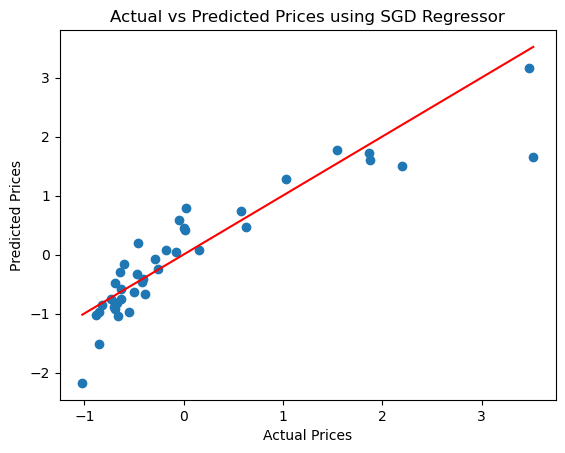

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('CarPrice_Assignment.csv')
print(data.head())
print(data.info())

data=data.drop(['CarName', 'car_ID'], axis=1)
data=pd.get_dummies(data,drop_first=True)

x=data.drop('price', axis=1)
y=data['price']

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1,1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sgd_model=SGDRegressor(max_iter=1000, tol=1e-3)

sgd_model.fit(x_train, y_train)

y_pred=sgd_model.predict(x_test)

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print("\nName: DEEPAK B")
print("Reg No: 25018314")
print("Mean Squared Error(y_test, y_pred):",mse)
print("R Squared Error:",r2)
print("Mean Absolute Error:",mae)

print("\nModel Coefficients:")
print("Coefficients:",sgd_model.coef_)
print("Intercept:",sgd_model.intercept_)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()